<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/Normalization_and_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
X = insurance.drop("charges", axis = 1)

In [4]:
y = insurance["charges"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

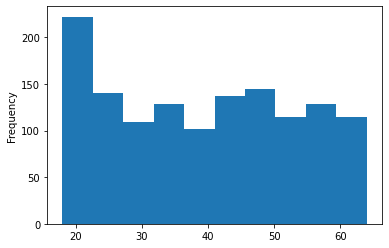

In [6]:
X["age"].plot(kind = "hist")

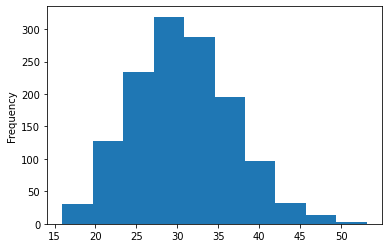

In [7]:
X["bmi"].plot(kind = "hist")

## Normalization

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [9]:
#create column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"] ),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

In [10]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [11]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [13]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

history = insurance_model_3.fit(X_train_normal, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [14]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.7495 - mae: 3160.7495


[3160.74951171875, 3160.74951171875]